NAMA : Rizki Amanda Putri

### Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

In [3]:
# Training Data
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# Testing Data
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


## Exploratory Data Analysis

In [7]:
def find_missing_train(data_train):
    # number of missing values
    count_missing = data_train.isnull().sum()
    # percentage of missing
    ratio_missing = count_missing/len(data_train)
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data = {'missing_count':count_missing, 'missing_ratio':ratio_missing}, index = data_train.columns.values)

find_missing_train(app_train).tail(10)

,missing_count,missing_ratio
FLAG_DOCUMENT_18,0,0.000000
FLAG_DOCUMENT_19,0,0.000000
FLAG_DOCUMENT_20,0,0.000000
FLAG_DOCUMENT_21,0,0.000000
AMT_REQ_CREDIT_BUREAU_HOUR,41519,0.135016
AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
AMT_REQ_CREDIT_BUREAU_YEAR,41519,0.135016


In [8]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
app_train.isnull().sum().sort_values(ascending=False).head(10)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
dtype: int64

In [10]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
# Number of unique classes in each numerical column
app_train.select_dtypes('number').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                    307511
TARGET                             2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 106, dtype: int64

In [13]:
# Missing Values Check for 'Object' datatypes
app_train.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [14]:
# Impute Missing Values of 'Object' datatypes
app_train['NAME_TYPE_SUITE'] = app_train['NAME_TYPE_SUITE'].fillna(app_train['NAME_TYPE_SUITE'].mode()[0])
app_train['OCCUPATION_TYPE'] = app_train['OCCUPATION_TYPE'].fillna(app_train['OCCUPATION_TYPE'].mode()[0])
app_train['FONDKAPREMONT_MODE'] = app_train['FONDKAPREMONT_MODE'].fillna(app_train['FONDKAPREMONT_MODE'].mode()[0])
app_train['HOUSETYPE_MODE'] = app_train['HOUSETYPE_MODE'].fillna(app_train['HOUSETYPE_MODE'].mode()[0])
app_train['WALLSMATERIAL_MODE'] = app_train['WALLSMATERIAL_MODE'].fillna(app_train['WALLSMATERIAL_MODE'].mode()[0])
app_train['EMERGENCYSTATE_MODE'] = app_train['EMERGENCYSTATE_MODE'].fillna(app_train['EMERGENCYSTATE_MODE'].mode()[0])

app_train.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64

In [15]:
# Missing Values Check for 'Number' datatypes
app_train.select_dtypes('number').isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 106, dtype: int64

In [16]:
app_train = app_train.select_dtypes('number').fillna(app_train.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [17]:
def missing_values_table(app_train):
        # Total missing values
        mis_val = app_train.select_dtypes('number').isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * app_train.isnull().sum() / len(app_train)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(app_train.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values

Your selected dataframe has 106 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [18]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [19]:
def find_missing_test(data_test):
    # number of missing values
    count_missing = data_test.isnull().sum()
    # percentage of missing
    ratio_missing = count_missing/len(data_test)
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data = {'missing_count':count_missing, 'missing_ratio':ratio_missing}, index = data_test.columns.values)

find_missing_test(app_test).tail(10)

,missing_count,missing_ratio
FLAG_DOCUMENT_18,0,0.000000
FLAG_DOCUMENT_19,0,0.000000
FLAG_DOCUMENT_20,0,0.000000
FLAG_DOCUMENT_21,0,0.000000
AMT_REQ_CREDIT_BUREAU_HOUR,6049,0.124097
AMT_REQ_CREDIT_BUREAU_DAY,6049,0.124097
AMT_REQ_CREDIT_BUREAU_WEEK,6049,0.124097
AMT_REQ_CREDIT_BUREAU_MON,6049,0.124097
AMT_REQ_CREDIT_BUREAU_QRT,6049,0.124097
AMT_REQ_CREDIT_BUREAU_YEAR,6049,0.124097


In [20]:
# Number of each type of column
app_test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [21]:
# Number of unique classes in each object column
app_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [22]:
# Number of unique classes in each numerical column
app_test.select_dtypes('number').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                    48744
CNT_CHILDREN                     11
AMT_INCOME_TOTAL                606
AMT_CREDIT                     2937
AMT_ANNUITY                    7491
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY         3
AMT_REQ_CREDIT_BUREAU_WEEK        3
AMT_REQ_CREDIT_BUREAU_MON         7
AMT_REQ_CREDIT_BUREAU_QRT         8
AMT_REQ_CREDIT_BUREAU_YEAR       16
Length: 105, dtype: int64

In [23]:
# Missing Values Check of 'Object' datatypes on 'Testing' data
app_test.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                 911
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               15605
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
FONDKAPREMONT_MODE            32797
HOUSETYPE_MODE                23619
WALLSMATERIAL_MODE            23893
EMERGENCYSTATE_MODE           22209
dtype: int64

In [24]:
# Impute Missing Values of 'Object' datatypes
app_test['NAME_TYPE_SUITE'] = app_test['NAME_TYPE_SUITE'].fillna(app_test['NAME_TYPE_SUITE'].mode()[0])
app_test['OCCUPATION_TYPE'] = app_test['OCCUPATION_TYPE'].fillna(app_test['OCCUPATION_TYPE'].mode()[0])
app_test['FONDKAPREMONT_MODE'] = app_test['FONDKAPREMONT_MODE'].fillna(app_test['FONDKAPREMONT_MODE'].mode()[0])
app_test['HOUSETYPE_MODE'] = app_test['HOUSETYPE_MODE'].fillna(app_test['HOUSETYPE_MODE'].mode()[0])
app_test['WALLSMATERIAL_MODE'] = app_test['WALLSMATERIAL_MODE'].fillna(app_test['WALLSMATERIAL_MODE'].mode()[0])
app_test['EMERGENCYSTATE_MODE'] = app_test['EMERGENCYSTATE_MODE'].fillna(app_test['EMERGENCYSTATE_MODE'].mode()[0])

In [25]:
# Missing Values Check
app_test.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64

In [26]:
# Missing Values Check 'number' datatypes on 'testing' table
def missing_values_table(app_test):
        # Total missing values
        mis_val = app_test.select_dtypes('number').isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * app_test.isnull().sum() / len(app_test)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(app_test.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(app_test)
missing_values

Your selected dataframe has 121 columns.
There are 58 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,33495.0,68.7
COMMONAREA_MODE,33495.0,68.7
COMMONAREA_MEDI,33495.0,68.7
NONLIVINGAPARTMENTS_MODE,33347.0,68.4
NONLIVINGAPARTMENTS_MEDI,33347.0,68.4
NONLIVINGAPARTMENTS_AVG,33347.0,68.4
LIVINGAPARTMENTS_AVG,32780.0,67.2
LIVINGAPARTMENTS_MODE,32780.0,67.2
LIVINGAPARTMENTS_MEDI,32780.0,67.2
FLOORSMIN_MEDI,32466.0,66.6


In [27]:
# Missing Values Check of 'Number' datatypes on 'Testing' data
app_test = app_test.select_dtypes('number').fillna(app_test.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [28]:
# CHECK MISSING VALUES LAGI WKWK
def missing_values_table(app_test):
        # Total missing values
        mis_val = app_test.select_dtypes('number').isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * app_test.isnull().sum() / len(app_test)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(app_test.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(app_test)
missing_values

Your selected dataframe has 105 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [29]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder

coder = LabelEncoder()
coder_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 5:
            # Train on the training data
            coder.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = coder.transform(app_train[col])
            app_test[col] = coder.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            coder_count += 1
            
print('%d columns were label encoded.' % coder_count)

0 columns were label encoded.


In [30]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 106)
Testing Features shape:  (48744, 105)


In [31]:
# Class Imbalance
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [34]:
# Class Imbalance for 'TARGET' column
app_train['TARGET_class'] = app_train['TARGET'] == 0
app_train['TARGET_class'].value_counts()

True     282686
False     24825
Name: TARGET_class, dtype: int64

In [35]:
X = app_train[[col for col in app_train.columns if (str(app_train[col].dtype) != 'object') and col not in ['TARGET', 'TARGET_class']]]
Y = app_train['TARGET_class'].values
print(X.shape)
print(Y.shape)

(307511, 105)
(307511,)


In [36]:
# Normal
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

# Class Imbalance
# Resampling
from imblearn import under_sampling, over_sampling

X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [37]:
print('Normal')
print(pd.Series(Y).value_counts())
print('\n')
print('Under Sampling')
print(pd.Series(y_under).value_counts())
print('\n')
print('Over Sampling')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Normal
True     282686
False     24825
dtype: int64


Under Sampling
True     34970
False    17485
dtype: int64


Over Sampling
True     197772
False     98886
dtype: int64


SMOTE
False    282686
True     282686
dtype: int64


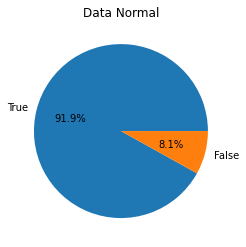

In [38]:
# Comparison Graph of Before and After Imbalance
pd.Series(Y).value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Data Normal")
plt.ylabel("")
plt.show()

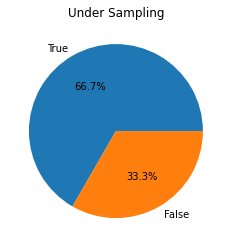

In [39]:
pd.Series(y_under).value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Under Sampling")
plt.ylabel("")
plt.show()

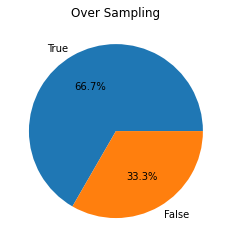

In [40]:
pd.Series(y_over).value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Over Sampling")
plt.ylabel("")
plt.show()

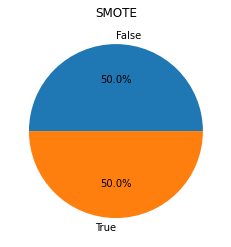

In [41]:
pd.Series(y_over_SMOTE).value_counts().plot.pie(autopct='%1.1f%%')
plt.title("SMOTE")
plt.ylabel("")
plt.show()

### Train Model

In [42]:
# Evaluation Function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def eval_classification(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  y_pred_proba = model.predict_proba(X_test)
  y_pred_proba_train = model.predict_proba(X_train)
  print('Precision (Train Set) : %.2f' % precision_score(y_train, y_pred_train))
  print('Precision (Test Set) : %.2f' % precision_score(y_test, y_pred))
  print('Recall (Train Set) : %.2f' % recall_score(y_train, y_pred_train))
  print('Recall (Test Set) : %.2f' % precision_score(y_test, y_pred))
  print('F1-Score (Train Set) : %.2f' % f1_score(y_train, y_pred_train))
  print('F1-Score (Test Set) : %.2f' % f1_score(y_test, y_pred))
  print('AUC (Train-Proba) : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
  print('AUC (Test-Proba) : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

# Show Best Parameter
def show_best_hyperparameter(model):
  print(model.best_estimator_.get_params())

# Fungsi Ploting Confusion Matrix
def plot_confusion_matrix(y, y_predict):
  plt.figure(figsize = (8,8))
  cm = confusion_matrix(y, y_predict)
  ax = plt.subplot()
  sns.heatmap(cm, annot = True, ax = ax, fmt = '.0f') # annot = True to annotate cells
  ax.set_xlabel('Predicted Labels')
  ax.set_ylabel('True Labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(['0', '1'])
  ax.yaxis.set_ticklabels(['0', '1'])

### Logistic Regression Modeling

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [44]:
# Split Train and Test Data
classifier =  LogisticRegression(max_iter=3000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
lr_probability = classifier.predict_proba(X_test)[:,1]

# Evaluate The Model
acc_lr=accuracy_score(y_test, y_pred)
recall_lr=recall_score(y_test, y_pred)
precision_lr=precision_score(y_test, y_pred)
f1score_lr=f1_score(y_test, y_pred)
AUC_LR=roc_auc_score(y_test, y_pred)

# Print ACCURACY and AUC values of model
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("ROC_AUC Score:", AUC_LR)

# Print Train and Test Score
trlr = (str(classifier.score(X_train, y_train)))
tslr = (str(classifier.score(X_test, y_test)))
print('Train score: ' + trlr)
print('Test score: ' + tslr)

Accuracy :  0.9204370542198712
ROC_AUC Score: 0.5
Train score: 0.918752932541102
Test score: 0.9204370542198712


In [45]:
# Summary of Classification Report
print(classification_report(y_pred, y_test)) 

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.92      0.96     92254

    accuracy                           0.92     92254
   macro avg       0.50      0.46      0.48     92254
weighted avg       1.00      0.92      0.96     92254



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


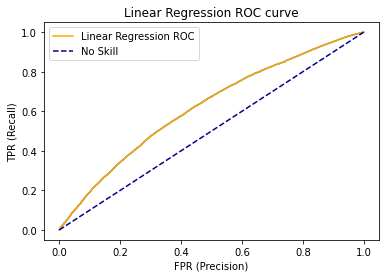

In [46]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.plot(fpr,tpr)
plt.plot(fpr, tpr, color='orange', label='Linear Regression ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
#plt.plot((0,1), ls='dashed',color='black')

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.legend()
plt.show()

### Random Forest Modeling

In [47]:
# Split Train and Test Data
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler = StandardScaler().fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
RF_probability = randomforest.predict_proba(X_test)[:,1]

# Evaluate The Model
AUC_RF=roc_auc_score(y_pred, y_test)
acc_rf=accuracy_score(y_test, y_pred)
recall_rf=recall_score(y_test, y_pred)
precision_rf=precision_score(y_test, y_pred)
f1score_rf=f1_score(y_test, y_pred)

# Print ACCURACY and AUC values of model
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("ROC_AUC Score:", AUC_RF)

# Print Train and Test Score
trlr = (str(randomforest.score(X_train, y_train)))
tslr = (str(randomforest.score(X_test, y_test)))
print('Train score: ' + trlr)
print('Test score: ' + tslr)

Accuracy :  0.9205346109653781
ROC_AUC Score: 0.7603455194178443
Train score: 0.9999860631710003
Test score: 0.9205346109653781


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.60      0.00      0.01      7340
        True       0.92      1.00      0.96     84914

    accuracy                           0.92     92254
   macro avg       0.76      0.50      0.48     92254
weighted avg       0.90      0.92      0.88     92254



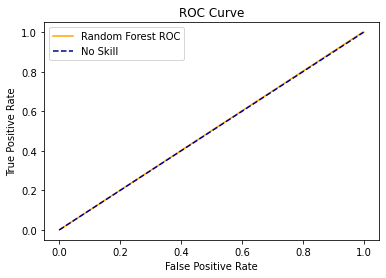

In [49]:
fpr2,tpr2,threshold=roc_curve(y_test, y_pred)
plt.plot(fpr2, tpr2, color='orange', label='Random Forest ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Model Evaluation Comparation

In [50]:
ind = ['Logistic regression','Randomforest']
data = {"Accuracy":[acc_lr,acc_rf],"Recall":[recall_lr,recall_rf],"Precision":[precision_lr,precision_rf],'f1_score':[f1score_lr,f1score_rf,],"ROC_AUC":[AUC_LR,AUC_RF]}
result = pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.920437,1.000000,0.920437,0.958570,0.500000
Randomforest,0.920535,0.999788,0.920691,0.958611,0.760346
